In [750]:
''' questions to be answered:
-Which player is the G.O.A.T based off goals alone?
-In what year did each player score the most goals?
-Which player had the greatesr number of solo goals?
    - Number of assisted goals?
-Is there a more common minute in which each player is likely to score a goal??
-How many clubs has each player been a part of?
   -Which was the most common team for each player? '''

' questions to be answered:\n-Which player is the G.O.A.T based off goals alone?\n-In what year did each player score the most goals?\n-Which player had the greatesr number of solo goals?\n    - Number of assisted goals?\n-Is there a more common minute in which each player is likely to score a goal??\n-How many clubs has each player been a part of?\n   -Which was the most common team for each player? '

In [751]:
import pandas as pd
import numpy as np
import matplotlib as mp
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [752]:
#change working directory to where the file is stored and then read in file
os.chdir('/Users/ahutchin/Desktop/messi vs ronaldo club goals data/')
goatdata = pd.read_csv('clean data.csv')
print(goatdata.head())
goatdata.shape
goatdata.Type

              Player Season               Competition      Matchday      Date  \
0  Cristiano Ronaldo  3-Feb             Liga Portugal             6   10/7/02   
1  Cristiano Ronaldo  3-Feb             Liga Portugal             6   10/7/02   
2  Cristiano Ronaldo  3-Feb             Liga Portugal             8  10/26/02   
3  Cristiano Ronaldo  3-Feb  Taca de Portugal Placard  Fourth Round  11/24/02   
4  Cristiano Ronaldo  3-Feb  Taca de Portugal Placard   Fifth Round  12/18/02   

  Venue         Club                 Opponent Result  Minute  \
0     H  Sporting CP            Moreirense FC   3:00      34   
1     H  Sporting CP            Moreirense FC   3:00      95   
2     A  Sporting CP              Boavista FC   1:02      88   
3     H  Sporting CP             CD Estarreja   4:01      67   
4     H  Sporting CP  FC Oliveira do Hospital   8:01      13   

                Type     Goal_assist  
0           Solo run             NaN  
1             Header       Rui Jorge  
2  Right-fo

0                Solo run
1                  Header
2       Right-footed shot
3        Left-footed shot
4                     NaN
              ...        
1395     Left-footed shot
1396     Left-footed shot
1397     Left-footed shot
1398     Left-footed shot
1399    Right-footed shot
Name: Type, Length: 1400, dtype: object

In [753]:
goatdata = pd.DataFrame(goatdata, columns = ['Player','Season','Competition','Matchday','Date','Venue',\
    'Club','Opponent','Result','Playing_Position', 'Minute','At_score','Type','Goal_assist'])
goatdata.head(7)

,Player,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,Cristiano Ronaldo,3-Feb,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:00,NaN,34,NaN,Solo run,NaN
1,Cristiano Ronaldo,3-Feb,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:00,NaN,95,NaN,Header,Rui Jorge
2,Cristiano Ronaldo,3-Feb,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,NaN,Right-footed shot,Carlos Martins
3,Cristiano Ronaldo,3-Feb,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,NaN,Left-footed shot,Cesar Prates
4,Cristiano Ronaldo,3-Feb,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,NaN,NaN,NaN
5,Cristiano Ronaldo,4-Mar,Premier League,11,11/1/03,H,Manchester United,Portsmouth FC,3:00,NaN,80,NaN,Direct free kick,NaN
6,Cristiano Ronaldo,4-Mar,FA Cup,Fifth Round,2/14/04,H,Manchester United,Manchester City,4:02,NaN,74,NaN,Right-footed shot,NaN


In [754]:
#drops certain unstructured columns that are not useful in current analysis goals
goatdata = goatdata.drop(['Competition','Opponent','Season','Matchday','Playing_Position','At_score'], axis =1)
#changes Minute column to integer
goatdata = goatdata.astype({'Minute': 'int'})
goatdata.head()

,Player,Date,Venue,Club,Result,Minute,Type,Goal_assist
0,Cristiano Ronaldo,10/7/02,H,Sporting CP,3:00,34,Solo run,NaN
1,Cristiano Ronaldo,10/7/02,H,Sporting CP,3:00,95,Header,Rui Jorge
2,Cristiano Ronaldo,10/26/02,A,Sporting CP,1:02,88,Right-footed shot,Carlos Martins
3,Cristiano Ronaldo,11/24/02,H,Sporting CP,4:01,67,Left-footed shot,Cesar Prates
4,Cristiano Ronaldo,12/18/02,H,Sporting CP,8:01,13,NaN,NaN


In [755]:
goatdata = goatdata.set_index('Player')
goatdata.head(8)

,Date,Venue,Club,Result,Minute,Type,Goal_assist
Player,,,,,,,
Cristiano Ronaldo,10/7/02,H,Sporting CP,3:00,34,Solo run,NaN
Cristiano Ronaldo,10/7/02,H,Sporting CP,3:00,95,Header,Rui Jorge
Cristiano Ronaldo,10/26/02,A,Sporting CP,1:02,88,Right-footed shot,Carlos Martins
Cristiano Ronaldo,11/24/02,H,Sporting CP,4:01,67,Left-footed shot,Cesar Prates
Cristiano Ronaldo,12/18/02,H,Sporting CP,8:01,13,NaN,NaN
Cristiano Ronaldo,11/1/03,H,Manchester United,3:00,80,Direct free kick,NaN
Cristiano Ronaldo,2/14/04,H,Manchester United,4:02,74,Right-footed shot,NaN
Cristiano Ronaldo,3/20/04,H,Manchester United,3:00,89,Right-footed shot,NaN


In [756]:
goatdata.Goal_assist = goatdata['Goal_assist'].replace(np.nan,0)
goatdata.head()

,Date,Venue,Club,Result,Minute,Type,Goal_assist
Player,,,,,,,
Cristiano Ronaldo,10/7/02,H,Sporting CP,3:00,34,Solo run,0
Cristiano Ronaldo,10/7/02,H,Sporting CP,3:00,95,Header,Rui Jorge
Cristiano Ronaldo,10/26/02,A,Sporting CP,1:02,88,Right-footed shot,Carlos Martins
Cristiano Ronaldo,11/24/02,H,Sporting CP,4:01,67,Left-footed shot,Cesar Prates
Cristiano Ronaldo,12/18/02,H,Sporting CP,8:01,13,NaN,0


In [757]:
#df["gender"] = np.where(df["gender"] == "female", 0, 1)
goatdata['Goal_assist'] = np.where(goatdata['Goal_assist'] == 0, goatdata['Goal_assist'], 1)
goatdata.head(15)

,Date,Venue,Club,Result,Minute,Type,Goal_assist
Player,,,,,,,
Cristiano Ronaldo,10/7/02,H,Sporting CP,3:00,34,Solo run,0
Cristiano Ronaldo,10/7/02,H,Sporting CP,3:00,95,Header,1
Cristiano Ronaldo,10/26/02,A,Sporting CP,1:02,88,Right-footed shot,1
Cristiano Ronaldo,11/24/02,H,Sporting CP,4:01,67,Left-footed shot,1
Cristiano Ronaldo,12/18/02,H,Sporting CP,8:01,13,NaN,0
Cristiano Ronaldo,11/1/03,H,Manchester United,3:00,80,Direct free kick,0
Cristiano Ronaldo,2/14/04,H,Manchester United,4:02,74,Right-footed shot,0
Cristiano Ronaldo,3/20/04,H,Manchester United,3:00,89,Right-footed shot,0
Cristiano Ronaldo,4/10/04,A,Manchester United,1:02,60,Header,1


In [758]:
#create a copy of the goatdata to work with ,without changing the original data yet
gd2 = goatdata.copy()
#creating 2 new columns in gd2, after the str in the original Result column
#is split at the colon (:) and the expand function allows the results to return
#as a set of columns and strings instead of series of lists
gd2[['res1','res2']] = gd2['Result'].str.split(':', n =2, expand = True)
gd2[['res1','res2']]=gd2[['res1','res2']].astype(str)
gd2.head(15)

,Date,Venue,Club,Result,Minute,Type,Goal_assist,res1,res2
Player,,,,,,,,,
Cristiano Ronaldo,10/7/02,H,Sporting CP,3:00,34,Solo run,0,3,00
Cristiano Ronaldo,10/7/02,H,Sporting CP,3:00,95,Header,1,3,00
Cristiano Ronaldo,10/26/02,A,Sporting CP,1:02,88,Right-footed shot,1,1,02
Cristiano Ronaldo,11/24/02,H,Sporting CP,4:01,67,Left-footed shot,1,4,01
Cristiano Ronaldo,12/18/02,H,Sporting CP,8:01,13,NaN,0,8,01
Cristiano Ronaldo,11/1/03,H,Manchester United,3:00,80,Direct free kick,0,3,00
Cristiano Ronaldo,2/14/04,H,Manchester United,4:02,74,Right-footed shot,0,4,02
Cristiano Ronaldo,3/20/04,H,Manchester United,3:00,89,Right-footed shot,0,3,00
Cristiano Ronaldo,4/10/04,A,Manchester United,1:02,60,Header,1,1,02


In [759]:
# replaces AET(at extra time) and on pens (on penalties) with '' which essentially
# just removes the letters from the digits. This will allow the two columns to eb 
# be compared to eachotehr equally later to determine a win, loss or draw result 
gd2['res2'] = gd2['res2'].replace ((' AET',' on pens'), ('',''), regex = True)
#creates a unique array out of the values in res2
gd2['res2'].unique()


array(['00', '02', '01', '04', '03', '06', '05', '5', '2', '08', '1', '4',
       '07'], dtype=object)

In [760]:
#create empty list and use a for loop to compare the numbers in res1 to res 2
#and using the result of the comparison to add a respresentative letter for a Win (3)
# loss(0) or draw(1) 
results_new = []
for x, y in zip(gd2.res1 , gd2.res2):
  if x > y:
    results_new.append(3)
  elif x < y:
    results_new.append(0)
  elif x == y:
    results_new.append(1)

In [761]:
#Replacing the old Results column data, with the new results to easily identify
# a win, loss or draw 
gd2['Result'] = results_new
goatdata['Result'] = gd2['Result']
goatdata.head(15)


,Date,Venue,Club,Result,Minute,Type,Goal_assist
Player,,,,,,,
Cristiano Ronaldo,10/7/02,H,Sporting CP,3,34,Solo run,0
Cristiano Ronaldo,10/7/02,H,Sporting CP,3,95,Header,1
Cristiano Ronaldo,10/26/02,A,Sporting CP,3,88,Right-footed shot,1
Cristiano Ronaldo,11/24/02,H,Sporting CP,3,67,Left-footed shot,1
Cristiano Ronaldo,12/18/02,H,Sporting CP,3,13,NaN,0
Cristiano Ronaldo,11/1/03,H,Manchester United,3,80,Direct free kick,0
Cristiano Ronaldo,2/14/04,H,Manchester United,3,74,Right-footed shot,0
Cristiano Ronaldo,3/20/04,H,Manchester United,3,89,Right-footed shot,0
Cristiano Ronaldo,4/10/04,A,Manchester United,3,60,Header,1


In [762]:
#replace H(home) or A(away) to be 1 or 0 respectively
goatdata['Venue'] = goatdata['Venue'].replace (('H','A'), (1,0), regex = True)
goatdata.head()

,Date,Venue,Club,Result,Minute,Type,Goal_assist
Player,,,,,,,
Cristiano Ronaldo,10/7/02,1,Sporting CP,3,34,Solo run,0
Cristiano Ronaldo,10/7/02,1,Sporting CP,3,95,Header,1
Cristiano Ronaldo,10/26/02,0,Sporting CP,3,88,Right-footed shot,1
Cristiano Ronaldo,11/24/02,1,Sporting CP,3,67,Left-footed shot,1
Cristiano Ronaldo,12/18/02,1,Sporting CP,3,13,NaN,0


In [763]:
gd3 = goatdata.copy()
gd3.head()

,Date,Venue,Club,Result,Minute,Type,Goal_assist
Player,,,,,,,
Cristiano Ronaldo,10/7/02,1,Sporting CP,3,34,Solo run,0
Cristiano Ronaldo,10/7/02,1,Sporting CP,3,95,Header,1
Cristiano Ronaldo,10/26/02,0,Sporting CP,3,88,Right-footed shot,1
Cristiano Ronaldo,11/24/02,1,Sporting CP,3,67,Left-footed shot,1
Cristiano Ronaldo,12/18/02,1,Sporting CP,3,13,NaN,0


In [764]:
import datetime as dt
import pandas as pd
#create new dataframe to manipulate Date column and change to datetime format
gd3['Date'] = pd.to_datetime(gd3['Date'])
gd3.head()


,Date,Venue,Club,Result,Minute,Type,Goal_assist
Player,,,,,,,
Cristiano Ronaldo,2002-10-07,1,Sporting CP,3,34,Solo run,0
Cristiano Ronaldo,2002-10-07,1,Sporting CP,3,95,Header,1
Cristiano Ronaldo,2002-10-26,0,Sporting CP,3,88,Right-footed shot,1
Cristiano Ronaldo,2002-11-24,1,Sporting CP,3,67,Left-footed shot,1
Cristiano Ronaldo,2002-12-18,1,Sporting CP,3,13,NaN,0


In [765]:
#pull out year only from the date column
gd3['Year'] = pd.DatetimeIndex(gd3['Date']).year
gd3['Year'].head()

Player
Cristiano Ronaldo    2002
Cristiano Ronaldo    2002
Cristiano Ronaldo    2002
Cristiano Ronaldo    2002
Cristiano Ronaldo    2002
Name: Year, dtype: int64

In [766]:
#add new column called 'Year' to original goatdata dataframe
goatdata['Year'] = gd3['Year']
goatdata.head()

,Date,Venue,Club,Result,Minute,Type,Goal_assist,Year
Player,,,,,,,,
Cristiano Ronaldo,10/7/02,1,Sporting CP,3,34,Solo run,0,2002
Cristiano Ronaldo,10/7/02,1,Sporting CP,3,95,Header,1,2002
Cristiano Ronaldo,10/26/02,0,Sporting CP,3,88,Right-footed shot,1,2002
Cristiano Ronaldo,11/24/02,1,Sporting CP,3,67,Left-footed shot,1,2002
Cristiano Ronaldo,12/18/02,1,Sporting CP,3,13,NaN,0,2002


In [767]:
print('*' * 100)
print('=' * 100)
print('*' * 100)
print('=' * 100)

****************************************************************************************************
****************************************************************************************************


In [768]:
########    Analysis    ########

In [769]:
''' questions to be answered:
-Which player is the G.O.A.T based off goals alone?
-In what year did each player score the most goals?
-Which player had the greatest number of solo goals?
    - Number of assisted goals?
-Is there a more common minute in which each player is likely to score a goal?
-How many clubs has each player been a part of?
    -Which was the most common club for each player? '''

' questions to be answered:\n-Which player is the G.O.A.T based off goals alone?\n-In what year did each player score the most goals?\n-Which player had the greatest number of solo goals?\n    - Number of assisted goals?\n-Is there a more common minute in which each player is likely to score a goal?\n-How many clubs has each player been a part of?\n    -Which was the most common club for each player? '

In [770]:
# which player is the G.O.A.T based off career goals?

goatdata['Goals'] = 1
career_goals = goatdata.groupby(['Player'], as_index = True )['Goals'].count()
print(career_goals)

Player
Cristiano Ronaldo    701
Lionel Messi         699
Name: Goals, dtype: int64


Based on club goals (excluding international team goals and therfore world cup goals) from 2002 to 2023, Cristiano Ronaldo is in the lead with 701 goals to Lionel Messi's 699.

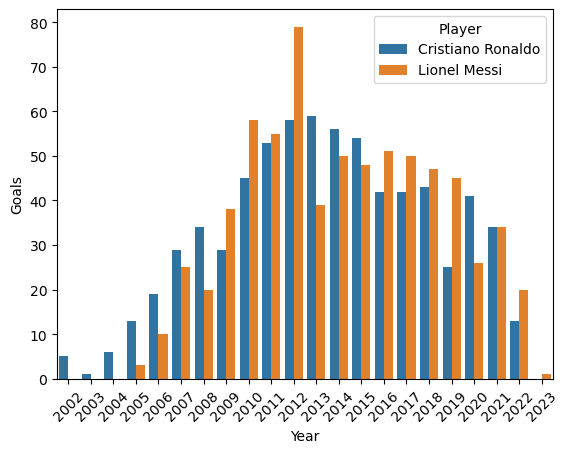

In [771]:
#In what year did each player score the most goals
yearly_goals = goatdata.groupby(['Player', 'Year'])['Goals'].count().reset_index()
#stacked = pd.DataFrame(yearly_goals)
#stacked = stacked.stack()
#stacked
goal_bar = sns.barplot( data = yearly_goals, x = 'Year', y = 'Goals', hue = 'Player')
plt.xticks(rotation = 45)
plt.show()

2012 was Messi's highest scoring year with roughly 80 goals. 2013 was Ronaldo's highest scoring year with roughly 60 goals. Interestingly, Ronaldo has more of a gradual distributipon whereas Messi has a good amount of drastic variation throughout the years. This would suggest that Ronaldo is more of a consistent goal scorer, and Messi has more of a rollercoaster career with high-highs and low-lows. Both players appear to have peaked between 2011 and 2013.

In [772]:
goatdata2 = goatdata.copy().reset_index()
v = ('Year', 'Goals', 'Player')
gpy = goatdata2.loc[goatdata2['Year']> 2010, v]
gpy = gpy.groupby(['Player', 'Year'], as_index = True)['Goals'].count()
gpy

Player             Year
Cristiano Ronaldo  2011    53
                   2012    58
                   2013    59
                   2014    56
                   2015    54
                   2016    42
                   2017    42
                   2018    43
                   2019    25
                   2020    41
                   2021    34
                   2022    13
Lionel Messi       2011    55
                   2012    79
                   2013    39
                   2014    50
                   2015    48
                   2016    51
                   2017    50
                   2018    47
                   2019    45
                   2020    26
                   2021    34
                   2022    20
                   2023     1
Name: Goals, dtype: int64

In [773]:
#finding the most common results across the board for each player
goatdata2.groupby(['Player']).agg(pd.Series.mode)

,Date,Venue,Club,Result,Minute,Type,Goal_assist,Year,Goals
Player,,,,,,,,,
Cristiano Ronaldo,"[4/5/15, 9/12/15]",1,Real Madrid,3,90,Right-footed shot,1,2013,1
Lionel Messi,3/7/12,1,FC Barcelona,3,55,Left-footed shot,1,2012,1


The above result shows the most common occurances for each column of data. The most common clubs were Real Madrid and FC Barcelona for Ronaldo and Messi respectively. In addition we can see that each player experienced a winning result more often than losses or draws.

We can also see that for Ronaldo, he scored most often in the 90th minute and Messi scored most often in the 55th minute. This however might not mean very much due to teh fact that there are thousands of data points in the minute column and out of the thousands of points, maybe '55' only showed up 3 times, but that was the most times a single number showed up.

We can also see that the most common goal type for Ronaldo was a right-footed shot, and for Messi it was a Left-footed shot. This alligns well with logic since Ronaldo is right-footed and Messi is left-footed.

In refernece to the date column, Ronaldo has two dates listed. This is most likely due to the fact that he scored multiple goals on each of those days and that number of goals were equal to eachother, and still more than any otehr date.

In [774]:
avg_goals_minute = goatdata2.groupby(['Player','Goals']).mean([goatdata2])
avg_goals_minute

,,Venue,Result,Minute,Year
Player,Goals,,,,
Cristiano Ronaldo,1,0.574893,2.529244,50.708987,2013.547789
Lionel Messi,1,0.596567,2.463519,51.914163,2014.128755


The average minute that each player scored a goal was right around the 50 minute mark. With 1400 data points, it makes sense that the mean would be 50 since 45 minutes is halftime(without extra time). The mean of venues is .57 and .59 which means that each player played just slightly more home games than away games. Ronaldo's average year was 2013 and Messi's was 2014. This is right around the time each player hit their stride and started to become big names in the game, and therfore started playing (and scoring) in more games.

In [775]:
clubs = goatdata2.groupby(['Player','Club'], as_index = True )['Goals'].count()
clubs

Player             Club               
Cristiano Ronaldo  Juventus FC            101
                   Manchester United      145
                   Real Madrid            450
                   Sporting CP              5
Lionel Messi       FC Barcelona           672
                   Paris Saint-Germain     27
Name: Goals, dtype: int64

As we can see above, Ronald has been apart of 4 clubs in his career and Messi has been in 2. Most of Messi's goals (672) were scored with FC Barcelona. Most of Ronaldo's goals (450) were scored with Real Madrid.

In [776]:
#Which player had the most number of solo goals?
    # Number of asssited goals? 0 = no assist, 1 - assisted
    
assists_small = goatdata.groupby(['Player','Goal_assist'], as_index = True )['Goal_assist'].count()
print(assists_small)

Player             Goal_assist
Cristiano Ronaldo  0              242
                   1              459
Lionel Messi       0              213
                   1              486
Name: Goal_assist, dtype: int64


Both Ronaldo and Messi had more assisted than non assisted goals. This makes sense as to get a 'non-assisted' goal, it would need to be scored off a turnover, a penalty kick, or a free kick. Most goals for any player are scored from assists. 

In [777]:
assists_per_year = goatdata.groupby(['Player', 'Year','Goal_assist'], as_index = True )['Goal_assist'].count()
print(assists_per_year)


Player             Year  Goal_assist
Cristiano Ronaldo  2002  0               2
                         1               3
                   2003  0               1
                   2004  0               3
                         1               3
                                        ..
Lionel Messi       2021  0              10
                         1              24
                   2022  0               5
                         1              15
                   2023  1               1
Name: Goal_assist, Length: 78, dtype: int64
